In [33]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [6]:
#importing dataset
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
#checking for missing value
data['region'].value_counts().sort_values()

northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

In [10]:
data['children'].value_counts().sort_values()

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

In [12]:
data['sex'].value_counts().sort_values()

female    662
male      676
Name: sex, dtype: int64

In [24]:
data=pd.get_dummies(data,drop_first=True)

In [25]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [26]:
#spliting data
X=data.drop('charges',axis=1)
y=data['charges']

In [29]:
#train and test sets
X_train,X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [30]:
#train the model
model=LinearRegression()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
#prediction
y_pre=model.predict(X_test)

In [34]:
#calculate mean square error
m=mean_squared_error(y_test,y_pre)
r2=r2_score(y_test,y_pre)

In [35]:
print(f'Mean Squared Error:{m}')
print(f'R^2 Score:{r2}')

Mean Squared Error:33596915.851361446
R^2 Score:0.7835929767120724


Text(0.5, 1.0, 'Actual Charges vs Predicted Charges')

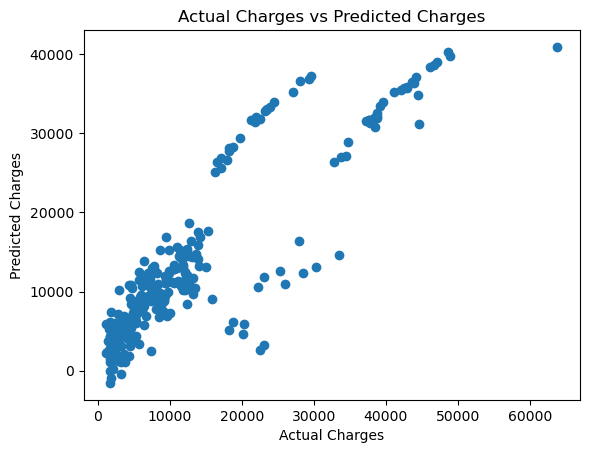

In [37]:
#plotting the actual vs predicted values
plt.scatter(y_test,y_pre)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual Charges vs Predicted Charges' )

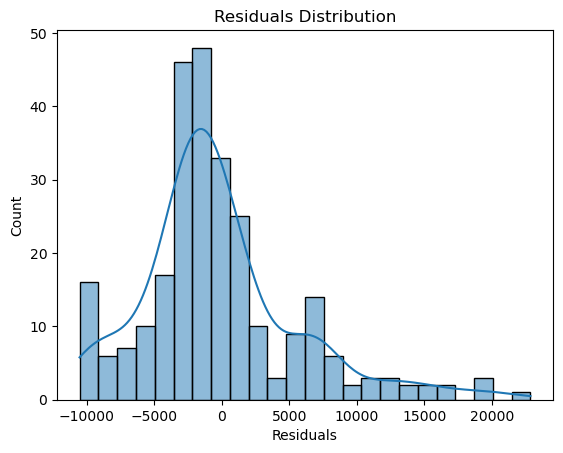

In [38]:
residuals=y_test-y_pre
sns.histplot(residuals,kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()